In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2019.csv', dtype = {'fips': str})
climate_2019 = ur_files.compute()
climate_2019 = climate_2019.loc[:, ~climate_2019.columns.str.contains('^Unnamed')]
climate_2019.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality,SuicideDeathRate
0,01001,75.264706,66.574028,9.576668,4.017496,0.134878,24.058824,136.294118,0.176471,0.0000,36.176471,69.510809,67.764757,3.0,11.362099
1,01003,12.427907,68.978591,9.251672,3.789960,0.063868,18.441860,39.627907,0.000000,0.0000,13.976744,76.607434,67.310117,4.0,10.303090
2,01005,94.311111,58.450971,9.010767,3.505694,0.143485,13.888889,45.555556,0.000000,0.0000,6.000000,68.853344,56.133099,6.0,9.502039
3,01007,162.637500,64.887816,9.502343,4.396241,0.139342,17.750000,106.250000,1.000000,0.0000,31.750000,70.428637,64.891663,2.0,9.496939
4,01009,243.931250,62.892951,9.413237,4.117425,0.121650,14.312500,103.062500,2.187500,0.3125,23.187500,67.067604,63.131224,2.0,19.022585


In [4]:
climate_2019 = climate_2019[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index','rurality','SuicideDeathRate']]

In [5]:
climate_2019 = climate_2019.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2019.iloc[:, 1:-1].values
y = climate_2019.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.26689654, 0.07364164, 0.04670812, 0.09743343, 0.05266734,
       0.05055572, 0.0468268 , 0.05884424, 0.00780386, 0.05253961,
       0.09950667, 0.08701773, 0.0595583 ])

In [10]:
len(rf.feature_importances_)

13

In [11]:
columns = climate_2019.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'rurality']

In [13]:
len(columns)

13

Text(0.5, 0, 'Random Forest Feature Importance')

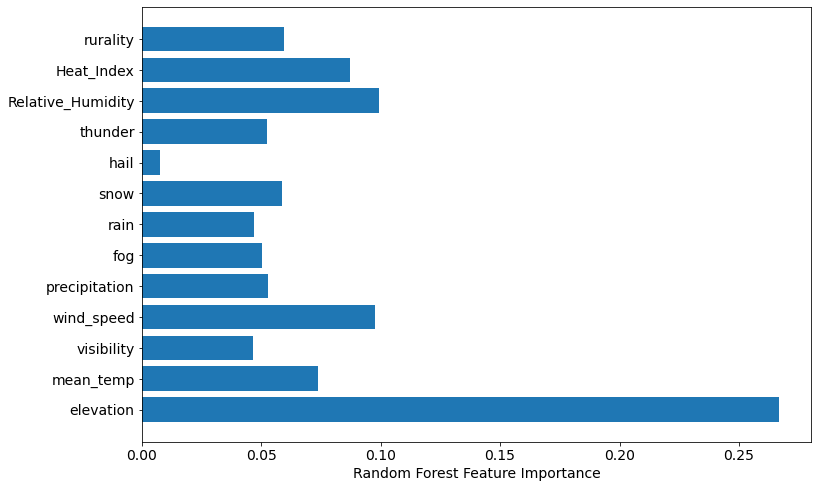

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8,  2,  6,  5,  9,  4,  7, 12,  1, 11,  3, 10,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.00780386, 0.04670812, 0.0468268 , 0.05055572, 0.05253961,
       0.05266734, 0.05884424, 0.0595583 , 0.07364164, 0.08701773,
       0.09743343, 0.09950667, 0.26689654])

Text(0.5, 0, 'Random Forest Feature Importance')

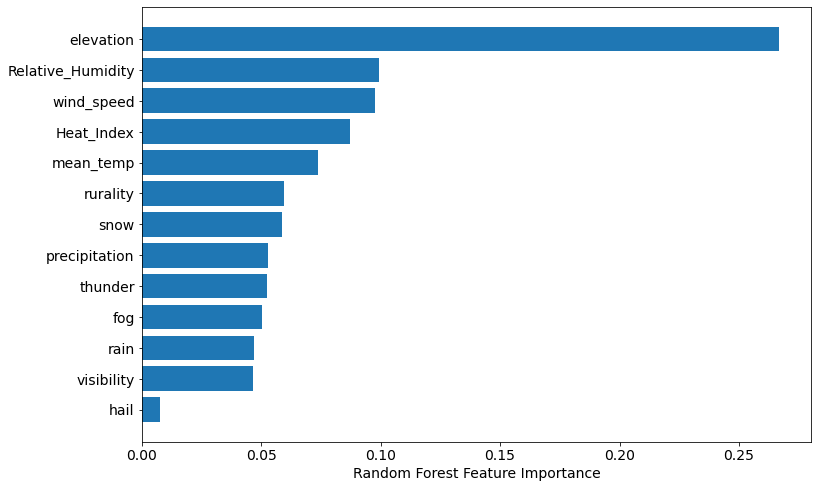

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

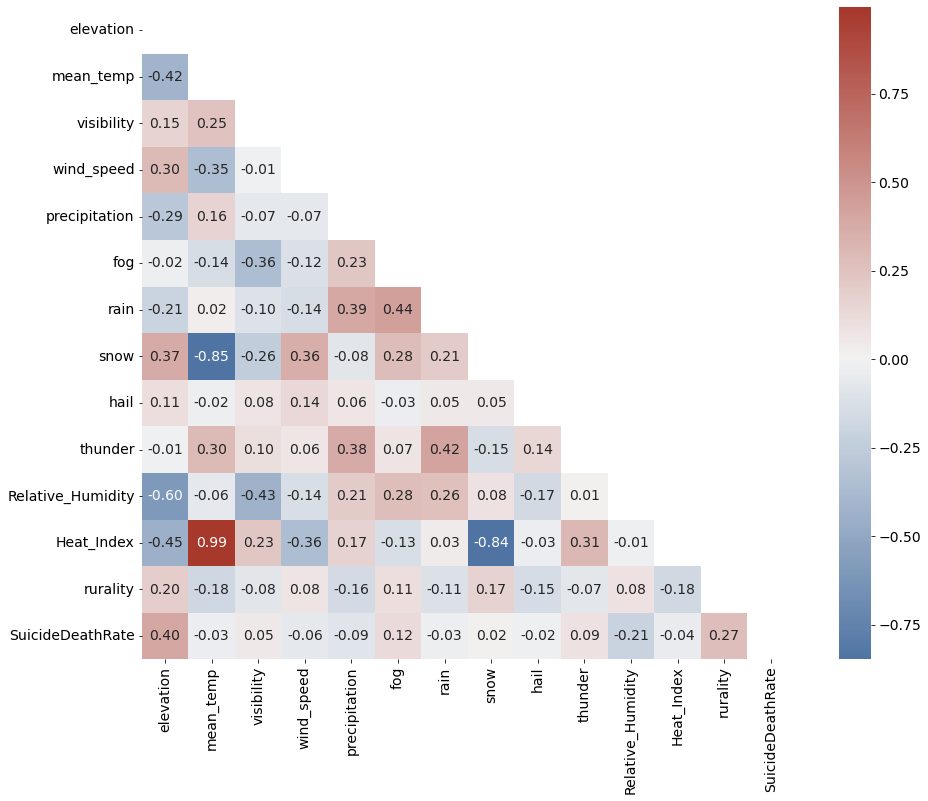

In [21]:
correlation_matrix(climate_2019)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2019.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2019 = ur_files.compute()
social_2019 = social_2019.loc[:, ~social_2019.columns.str.contains('^Unnamed')]
social_2019.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,17051,23194.0,0.172299,0.168072,0.121243,0.041101,0.261166,0.018095,0.016103,0.188175,0.042198,0.206538,0.078692,0.592117,0.077487,0.245957,"Fayette County, IL",6.645319
1,17107,27546.0,0.092998,0.116134,0.031129,0.065666,0.246532,0.006298,0.038091,0.180119,0.042769,0.193325,0.136331,0.531459,0.141606,0.146590,"Logan County, IL",10.576008
2,17165,25342.0,0.210625,0.138024,0.127362,0.087345,0.232927,0.019755,0.031335,0.199425,0.030939,0.216554,0.084896,0.784262,0.020588,0.279398,"Saline County, IL",11.391890
3,17097,45766.0,0.079334,0.100785,0.016933,0.050483,0.170007,0.022895,0.116606,0.137338,0.264006,0.244551,0.383638,0.386471,0.025938,0.183018,"Lake County, IL",2.871356
4,17127,23539.0,0.167481,0.140006,0.186591,0.074373,0.241649,0.031089,0.023665,0.208313,0.023607,0.225332,0.117589,0.661347,0.023419,0.209114,"Massac County, IL",12.678931


In [23]:
social_2019['SuicideDeathRate'].isna().sum()

128

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2019 = social_2019.dropna(how = 'any')

In [25]:
social_2019.shape

(3092, 18)

In [26]:
X = social_2019.iloc[:, 1:-2].values
y = social_2019.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.05944874, 0.03872645, 0.07165892, 0.17778125, 0.05878944,
       0.04952744, 0.05297447, 0.04487673, 0.08387629, 0.05577472,
       0.06310396, 0.0538251 , 0.09152171, 0.04592427, 0.05219051])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2019.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2019.shape

(3092, 18)

In [32]:
climate_2019.shape

(2937, 15)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

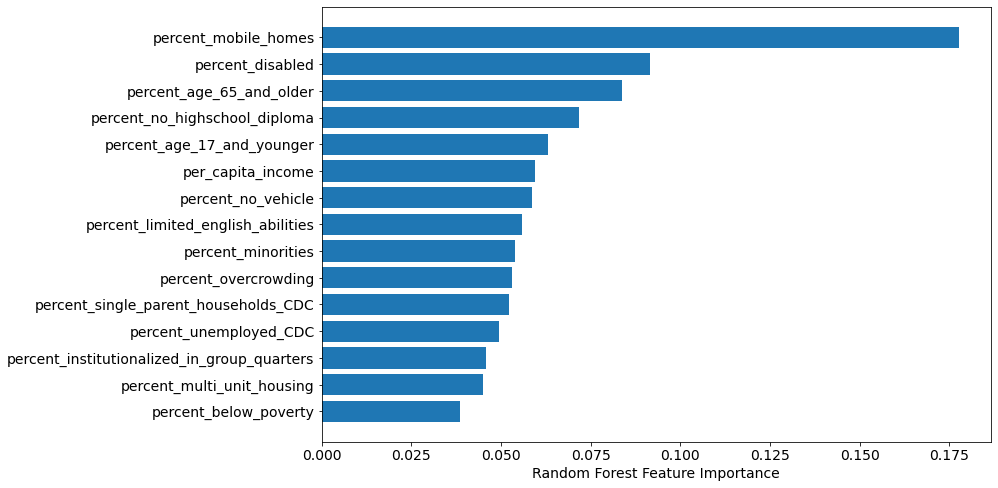

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

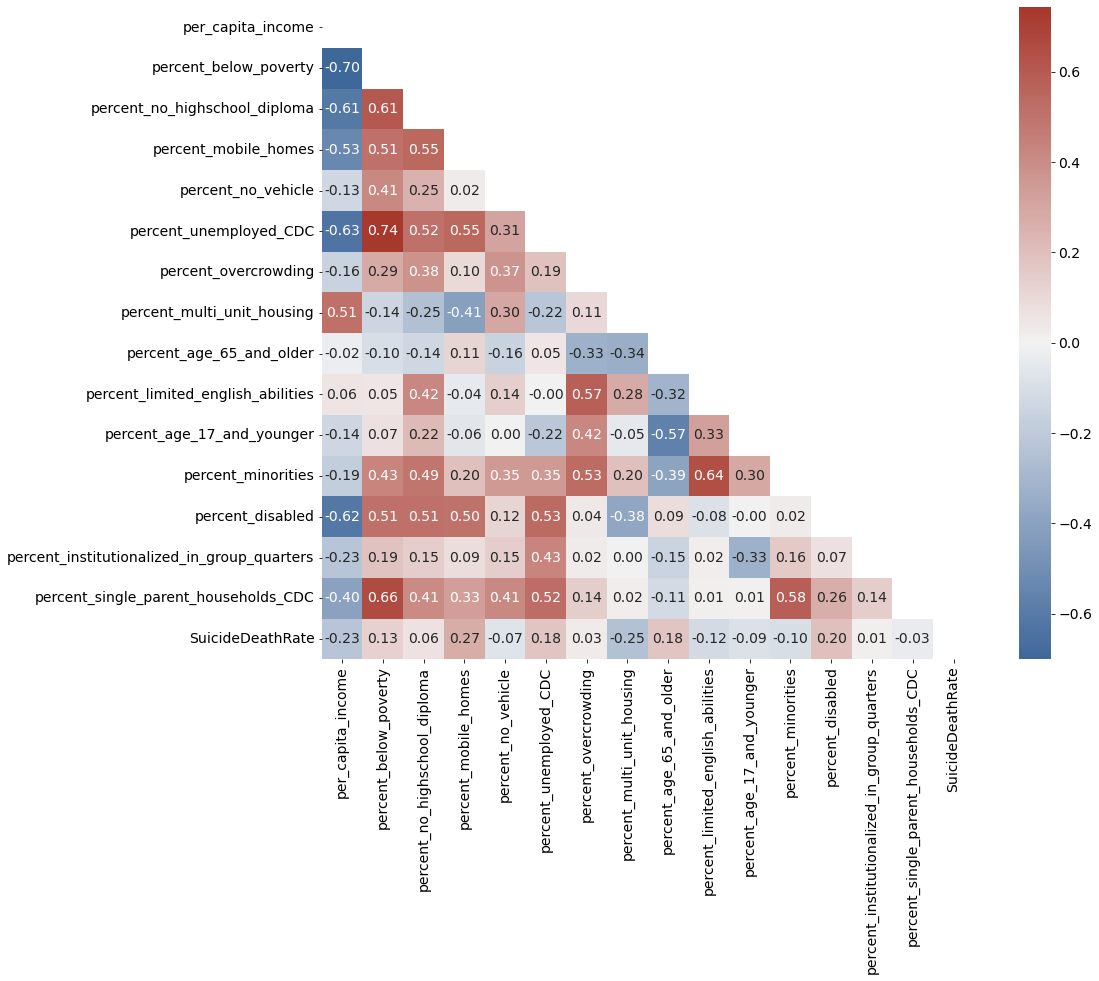

In [36]:
correlation_matrix(social_2019)

## find the rank of importances of all factors

In [37]:
df_total = social_2019.merge(climate_2019, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality
0,17051,23194.0,0.172299,0.168072,0.121243,0.041101,0.261166,0.018095,0.016103,0.188175,...,5.668848,0.092116,23.714286,148.857143,36.142857,0.0,49.714286,73.041217,54.531103,6.0
1,17107,27546.0,0.092998,0.116134,0.031129,0.065666,0.246532,0.006298,0.038091,0.180119,...,4.868681,0.082689,20.000000,152.000000,22.000000,0.0,42.000000,76.314146,51.980329,5.0
2,17165,25342.0,0.210625,0.138024,0.127362,0.087345,0.232927,0.019755,0.031335,0.199425,...,4.976438,0.127861,34.000000,148.000000,27.000000,0.0,38.000000,75.751055,55.565829,6.0
3,17097,45766.0,0.079334,0.100785,0.016933,0.050483,0.170007,0.022895,0.116606,0.137338,...,7.551244,0.115030,32.622642,109.698113,42.459119,0.0,27.238994,68.724362,46.826146,2.0
4,17127,23539.0,0.167481,0.140006,0.186591,0.074373,0.241649,0.031089,0.023665,0.208313,...,3.778904,0.157415,22.000000,161.000000,20.000000,0.0,54.000000,72.281240,55.069895,5.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index', 'rurality'],
      dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index',
       'fog', 'rain', 'snow', 'hail', 'thunder','rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(2937, 31)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,precipitation,Relative_Humidity,Heat_Index,fog,rain,snow,hail,thunder,rurality,SuicideDeathRate
0,17051,"Fayette County, IL",0.172299,23194.0,0.261166,0.168072,0.188175,0.206538,0.592117,0.245957,...,0.092116,73.041217,54.531103,23.714286,148.857143,36.142857,0.0,49.714286,6.0,6.645319
1,17107,"Logan County, IL",0.092998,27546.0,0.246532,0.116134,0.180119,0.193325,0.531459,0.146590,...,0.082689,76.314146,51.980329,20.000000,152.000000,22.000000,0.0,42.000000,5.0,10.576008
2,17165,"Saline County, IL",0.210625,25342.0,0.232927,0.138024,0.199425,0.216554,0.784262,0.279398,...,0.127861,75.751055,55.565829,34.000000,148.000000,27.000000,0.0,38.000000,6.0,11.391890
3,17097,"Lake County, IL",0.079334,45766.0,0.170007,0.100785,0.137338,0.244551,0.386471,0.183018,...,0.115030,68.724362,46.826146,32.622642,109.698113,42.459119,0.0,27.238994,2.0,2.871356
4,17127,"Massac County, IL",0.167481,23539.0,0.241649,0.140006,0.208313,0.225332,0.661347,0.209114,...,0.157415,72.281240,55.069895,22.000000,161.000000,20.000000,0.0,54.000000,5.0,12.678931


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.01420359, 0.02616322, 0.02008916, 0.01647826, 0.03655283,
       0.01922926, 0.04885457, 0.01705668, 0.03181526, 0.03773984,
       0.01856706, 0.12035044, 0.02910115, 0.01759522, 0.01689635,
       0.21095317, 0.02019621, 0.01978665, 0.06161139, 0.0214448 ,
       0.04281346, 0.03268685, 0.02627635, 0.01993058, 0.02556386,
       0.00453418, 0.03137961, 0.01213   ])

In [47]:
len(rf.feature_importances_)

28

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

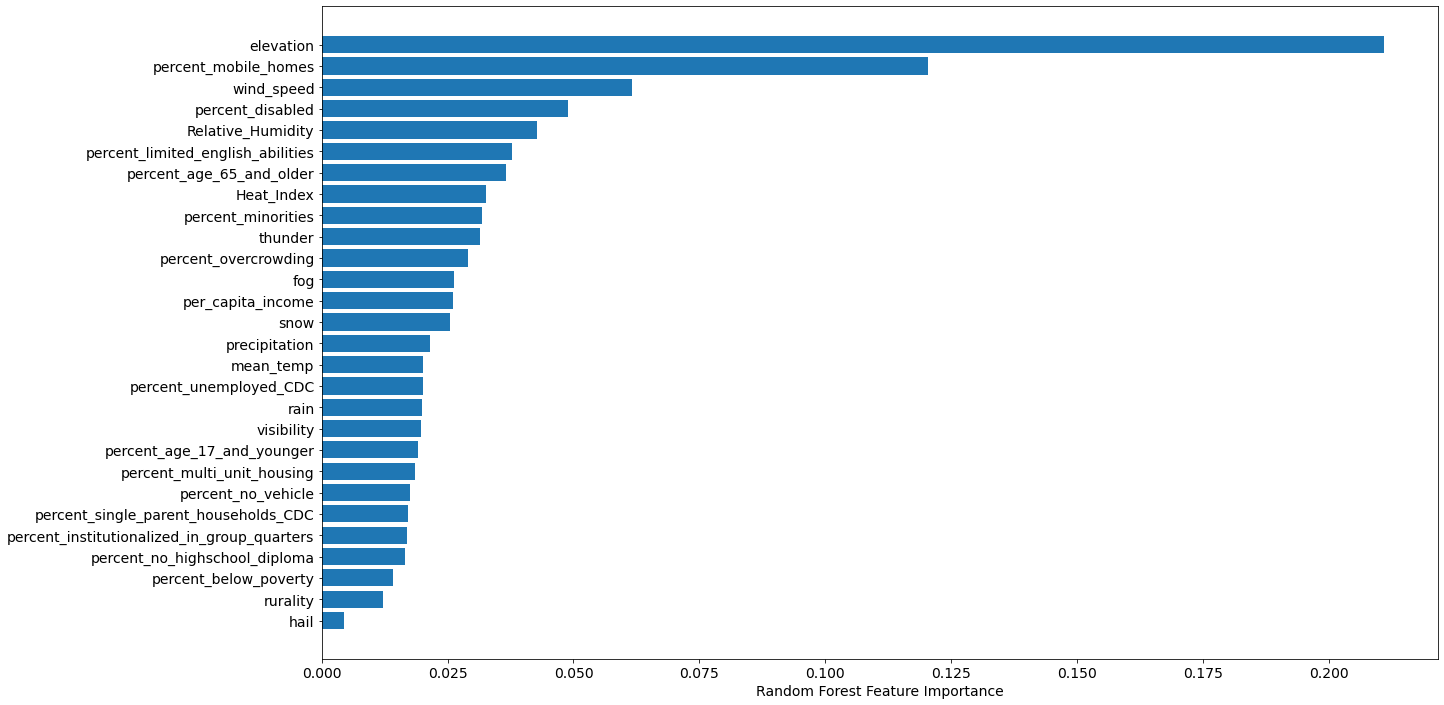

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SHAP

In [52]:
import xgboost
import shap

In [53]:
climate_2019.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,rurality,SuicideDeathRate
0,01001,75.264706,66.574028,9.576668,4.017496,0.134878,24.058824,136.294118,0.176471,0.0000,36.176471,69.510809,67.764757,3.0,11.362099
1,01003,12.427907,68.978591,9.251672,3.789960,0.063868,18.441860,39.627907,0.000000,0.0000,13.976744,76.607434,67.310117,4.0,10.303090
2,01005,94.311111,58.450971,9.010767,3.505694,0.143485,13.888889,45.555556,0.000000,0.0000,6.000000,68.853344,56.133099,6.0,9.502039
3,01007,162.637500,64.887816,9.502343,4.396241,0.139342,17.750000,106.250000,1.000000,0.0000,31.750000,70.428637,64.891663,2.0,9.496939
4,01009,243.931250,62.892951,9.413237,4.117425,0.121650,14.312500,103.062500,2.187500,0.3125,23.187500,67.067604,63.131224,2.0,19.022585


In [54]:
X = climate_2019.iloc[:, 1:-1]
y = climate_2019.iloc[:, -1].array

In [55]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


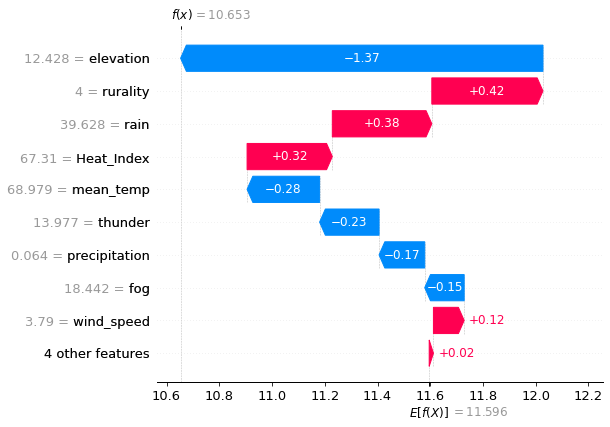

In [56]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

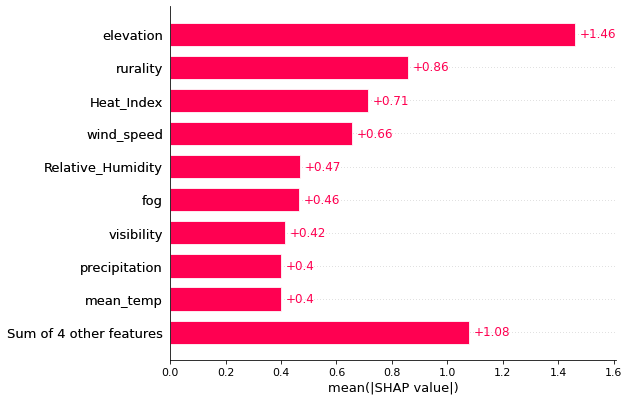

In [57]:
shap.plots.bar(shap_values)

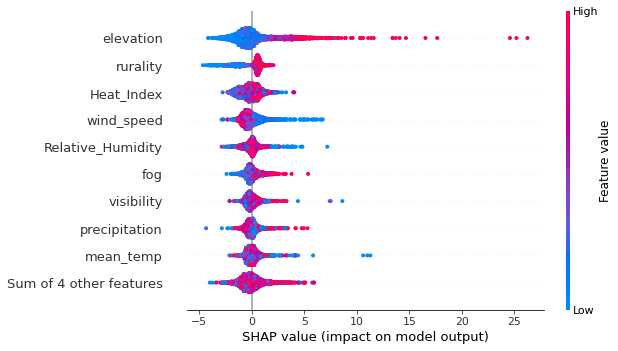

In [58]:
shap.plots.beeswarm(shap_values)

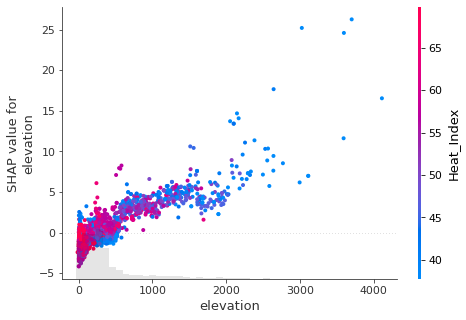

In [59]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

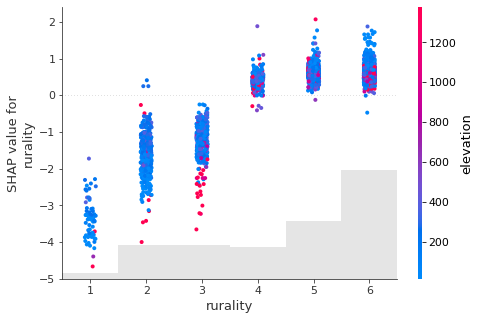

In [60]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

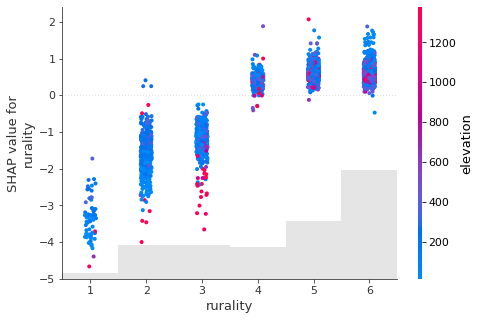

In [61]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

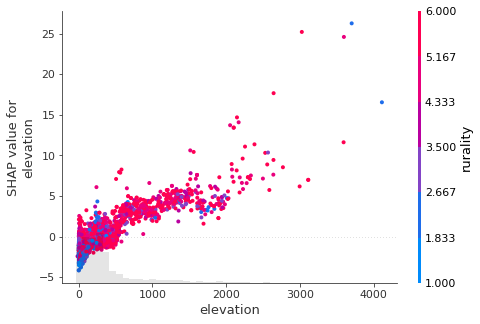

In [62]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

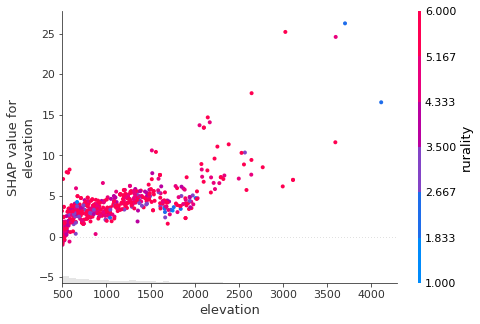

In [63]:
shap.plots.scatter(shap_values[:,"elevation"],shap_values[:,"rurality"], xmin=500)

### social economic factors

In [64]:
social_2019.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,17051,23194.0,0.172299,0.168072,0.121243,0.041101,0.261166,0.018095,0.016103,0.188175,0.042198,0.206538,0.078692,0.592117,0.077487,0.245957,"Fayette County, IL",6.645319
1,17107,27546.0,0.092998,0.116134,0.031129,0.065666,0.246532,0.006298,0.038091,0.180119,0.042769,0.193325,0.136331,0.531459,0.141606,0.146590,"Logan County, IL",10.576008
2,17165,25342.0,0.210625,0.138024,0.127362,0.087345,0.232927,0.019755,0.031335,0.199425,0.030939,0.216554,0.084896,0.784262,0.020588,0.279398,"Saline County, IL",11.391890
3,17097,45766.0,0.079334,0.100785,0.016933,0.050483,0.170007,0.022895,0.116606,0.137338,0.264006,0.244551,0.383638,0.386471,0.025938,0.183018,"Lake County, IL",2.871356
4,17127,23539.0,0.167481,0.140006,0.186591,0.074373,0.241649,0.031089,0.023665,0.208313,0.023607,0.225332,0.117589,0.661347,0.023419,0.209114,"Massac County, IL",12.678931


In [65]:
X = social_2019.iloc[:, 1:-2]
y = social_2019.iloc[:, -1].array

In [66]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


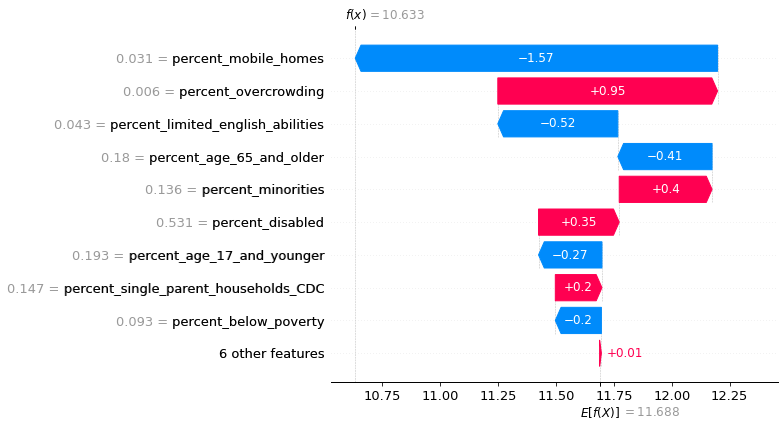

In [67]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

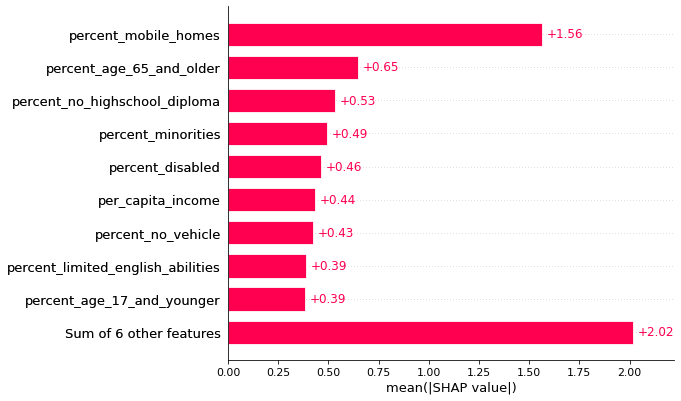

In [68]:
shap.plots.bar(shap_values)

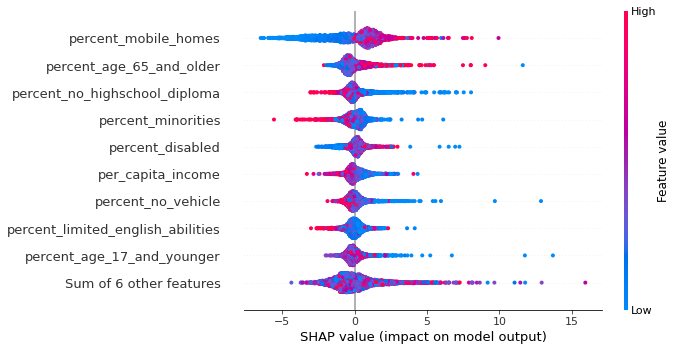

In [69]:
shap.plots.beeswarm(shap_values)

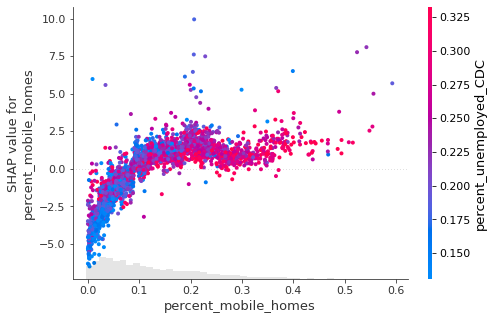

In [70]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)